In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('dataset/UK_foods.csv',index_col='Unnamed: 0')
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [7]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


<AxesSubplot:>

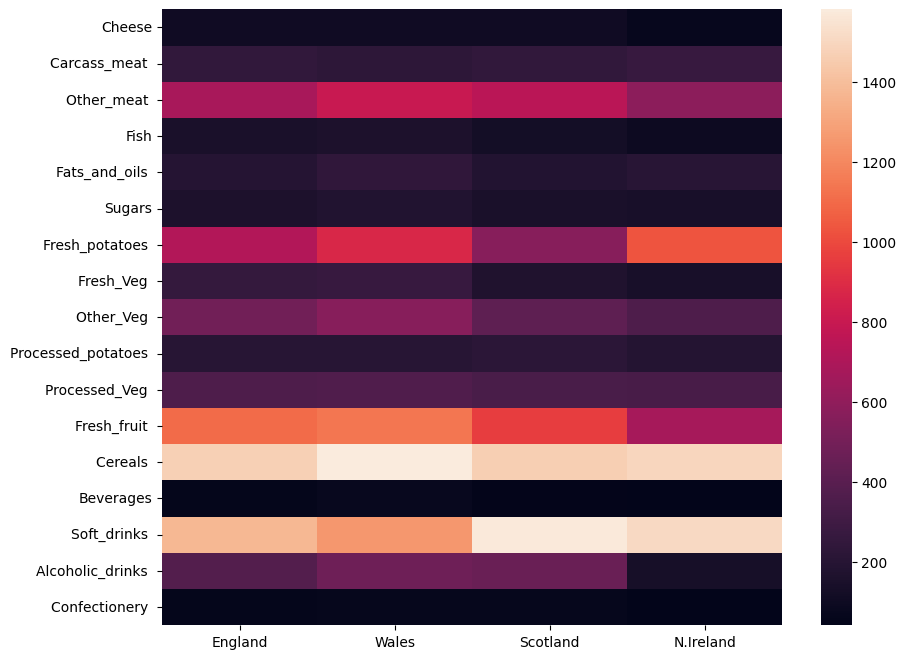

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.transpose().values)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

latent_dim = 2

encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu'))
encoder.add(Dense(units=latent_dim,activation='relu',input_shape=[4]))

decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[latent_dim,]))
decoder.add(Dense(units=8,activation='relu'))
decoder.add(Dense(units=17,activation='relu'))

autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(learning_rate=1.5))

In [15]:
autoencoder.fit(scaled_df,scaled_df,epochs=15, verbose=0)

In [16]:
encoded_2dim = encoder.predict(scaled_df)

1/1 [==============================] - 0s 154ms/step


In [17]:
encoded_2dim

array([[0.46283036, 1.2432425 ],
       [0.56800336, 2.6559765 ],
       [0.21312833, 0.31207302],
       [0.04752687, 0.        ]], dtype=float32)

In [19]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [20]:
results = pd.DataFrame(data=encoded_2dim,index=df.transpose().index,
                      columns=['C1','C2'])

In [21]:
results = results.reset_index()

In [22]:
results

,index,C1,C2
0,England,0.462830,1.243243
1,Wales,0.568003,2.655977
2,Scotland,0.213128,0.312073
3,N.Ireland,0.047527,0.000000


<AxesSubplot:xlabel='C1', ylabel='C2'>

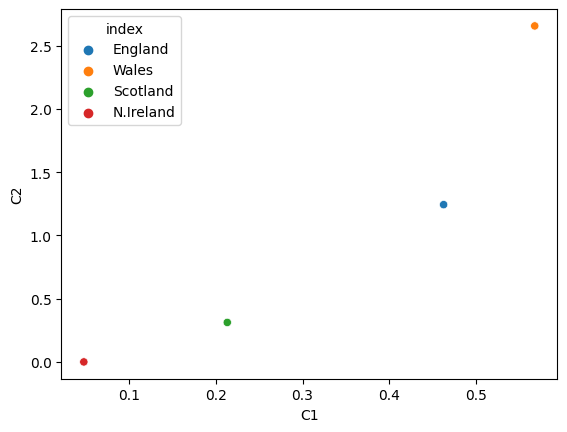

In [23]:
sns.scatterplot(x='C1',y='C2',data=results,hue='index')